In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [169]:
image=cv2.imread('images/me.jpg')
original_image=image.copy()

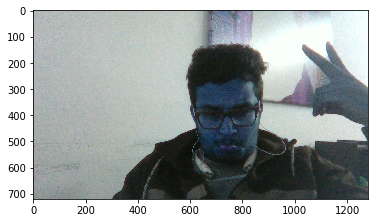

In [170]:
plt.imshow(image)

In [171]:
gray_image= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

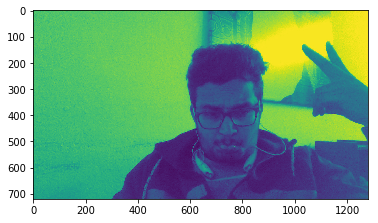

In [172]:
plt.imshow(gray_image)

In [173]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [174]:
classes = []
with open('coco.names', 'r') as f:
    
    classes = [ line.strip() for line in f.readlines()]  # line. strip le \n lai faldinxa

In [175]:
layer_names = net.getLayerNames()

In [176]:
layer_names

['conv_0',
 'bn_0',
 'relu_0',
 'conv_1',
 'bn_1',
 'relu_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'conv_3',
 'bn_3',
 'relu_3',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'conv_7',
 'bn_7',
 'relu_7',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_16',
 'conv_17',
 'bn_17',
 'relu_17',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_19',
 'conv_20',
 'bn_20',
 'relu_20',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_22',
 'conv_23',
 'bn_23',
 'relu_23',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_25',
 'conv_26',
 'bn_26',
 'relu_26',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_28',
 'conv_29',
 'bn_29',
 'relu_29',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_31',
 'conv_32',
 'bn_32',
 'relu_32',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_34',
 'conv_35',
 'bn

In [177]:
output_layer=[layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [178]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [179]:
height,width= gray_image.shape

In [180]:
blob=cv2.dnn.blobFromImage(image,0.003,(512,512),(0,0,0), True) #Scale factor ho 0.000003 haru

In [181]:
net.setInput(blob)
outs=net.forward(output_layer)

In [182]:
len(outs),

(3,)

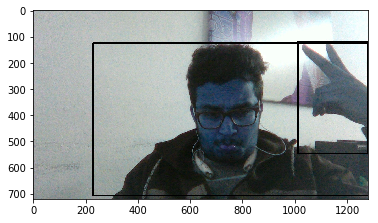

In [191]:
class_ids = []
boxes = []
confidences = []
for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
    
        if confidence > 0.4:
            cx = int(det[0]*width)
            cy = int(det[1]*height)

            w = int(det[2]*width)
            h = int(det[3]*height)

            x, y = int(cx - w/2), int(cy - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 5)
    plt.imshow(image)

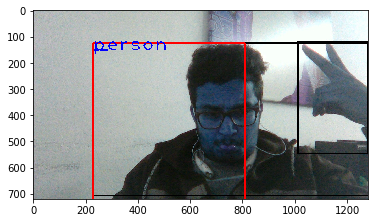

In [200]:
n_det= len(boxes)

indexes=cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

for i in range(n_det):
    if i in indexes:
        
        x,y,w,h=boxes[i]
        label=str(classes[class_ids[i]])
        cv2.rectangle(original_image,(x,y),(x+h,y+w), (255,0,0), 5)
        cv2.putText(original_image, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN,10,(0,0,255),3)
        
plt.imshow(image)        

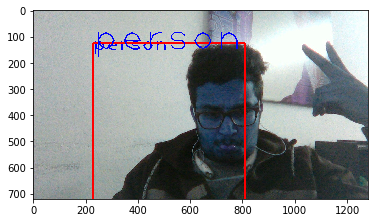

In [201]:
plt.imshow(original_image)        